## Project: Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.stats import shapiro

### 1. 통계 문제
#### 문제 1) 
빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다.    
빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다.    
그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [24]:
# sample이 30을 넘지 않으므로 단일 평균에 대한 t-test 양측 검정 (500g 이상/이하 여부를 구한다면 단측 검증이지만, 무게 충족 여부를 구하므로 양쪽 모두 고려)
mu = 495
sigma = 10
num = 25 
alpha = 0.05
t_test = norm.rvs(loc=mu, scale=sigma, size=num)
t_statistic, p_value = stats.ttest_1samp(t_test, popmean=500)

In [25]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.3718, p-value: 0.0261. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제 2) 분포 시각화   
문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.   
- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

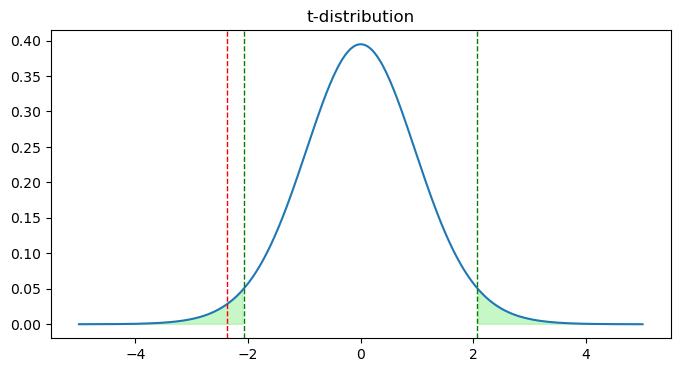

In [96]:
degrees_of_freedom = len(t_test) - 1
x = np.linspace(-5, 5, 300)
y = stats.t.pdf(x, df=degrees_of_freedom)
critical_value = stats.t.ppf(1 - alpha/2, df=degrees_of_freedom)

plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title('t-distribution')
plt.axvline(t_statistic, color='red', linestyle='dashed', linewidth=1)
plt.axvline(critical_value, color='green', linestyle='--', linewidth=1)
plt.axvline(-critical_value, color='green', linestyle='--', linewidth=1)
plt.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value), color='lightgreen', alpha=0.5)
plt.show()


### 문제 3) 단일 t 표본 검정
- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.
  - 수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 향상에 효과가 있는지 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

In [ ]:
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터
alpha = 0.05 
num_of_samples = len(sample_scores)
t_stat2, p_value2 = stats.ttest_1samp(sample_scores, popmean=75, alternative = 'greater')

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat2:.4f}, p-value: {p_value2:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat2:.4f}, p-value: {p_value2:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

# 단측검정 

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정
- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.
  - 관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.
  - `scipy.stats.levene` 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

In [ ]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

from scipy.stats import shapiro
normal1 = shapiro(group_A)
normal2 = shapiro(group_B)
print(normal1, normal2) # 정규성 만족

ShapiroResult(statistic=0.8878741242252015, pvalue=0.16046025491142957) ShapiroResult(statistic=0.974410981859118, pvalue=0.9510980815213171)


In [ ]:
from scipy.stats import levene, ttest_ind
print(levene(group_A, group_B)) # 등분산성 만족 #등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가 # ttest_ind(a,b, equal_var=False)
from scipy.stats import bartlett
print(bartlett(group_A, group_B)) 

LeveneResult(statistic=1.2856009170267175, pvalue=0.27026881992870333)
BartlettResult(statistic=2.0587935888519024, pvalue=0.15132993904077893)


In [38]:
t_stat, p_value3 = ttest_ind(group_A, group_B)
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value3:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value3:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응 표본 t검정
대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.   
(ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요. 
- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

In [ ]:
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 정규성 검정
from scipy.stats import shapiro

normal1 = shapiro(before)
normal2 = shapiro(after)
print(normal1, normal2)

ShapiroResult(statistic=0.9843959271089309, pvalue=0.9843231263513831) ShapiroResult(statistic=0.9798712076792261, pvalue=0.9644751043086991)


In [ ]:
# 등분산성 만족
from scipy.stats import levene
print(levene(before, after))

from scipy.stats import bartlett
print(bartlett(before, after))

LeveneResult(statistic=0.02742973247544883, pvalue=0.8703025812467897)
BartlettResult(statistic=0.015279670821897932, pvalue=0.901623309769492)


In [46]:
# 대응표본 t검정 수행
from scipy.stats import ttest_rel
t_stat4, p_value4 = ttest_rel(before,after)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat4:.4f}, p-value: {p_value4:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat4:.4f}, p-value: {p_value4:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


### 문제 6) 표본 추출
- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 
- 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [49]:
retail1 = pd.read_excel('./online_retail_II.xlsx', sheet_name = 'Year 2009-2010')
retail2 = pd.read_excel('./online_retail_II.xlsx', sheet_name = 'Year 2010-2011')
retail = pd.concat([retail1, retail2], ignore_index = True)
print(retail.shape)
retail.head(3)

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [ ]:
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

18.07

In [107]:
retail_br = retail[retail['Country'] == 'United Kingdom']
retail_br['TotalPrice'].mean().round(2)

16.69

In [126]:
num1 = 30
num2 = 100
num3 = 300
mean1 = np.mean(np.random.choice(retail_br['TotalPrice'], size = num1, replace=True)).round(2)
mean2 = np.mean(np.random.choice(retail_br['TotalPrice'], size = num2, replace=True)).round(2)
mean3 = np.mean(np.random.choice(retail_br['TotalPrice'], size = num3, replace=True)).round(2)
print(f'Sample size: {num1}, Mean TotalPrice: {mean1}')
print(f'Sample size: {num2}, Mean TotalPrice: {mean2}')
print(f'Sample size: {num3}, Mean TotalPrice: {mean3}')

Sample size: 30, Mean TotalPrice: 19.66
Sample size: 100, Mean TotalPrice: 16.7
Sample size: 300, Mean TotalPrice: 20.93


### 문제 7) 신뢰 구간
- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [78]:

np.mean(retail[retail['Country']=='United Kingdom']['TotalPrice'])

16.69426584023722

In [79]:
# 표본 평균구하기
sample_mean = np.mean(retail[retail['Country']=='United Kingdom']['TotalPrice'])
sample_std = np.std(retail[retail['Country']=='United Kingdom']['TotalPrice'], ddof=1)  # ddof=1 for sample std

# 데이터사이즈
n = len(retail[retail['Country']=='United Kingdom']['TotalPrice'])

# 표준오차 구하기(표준편차 나누기 데이터갯수의 제곱근)
standard_error = sample_std / np.sqrt(n)

# 95% 신뢰구간 구하기
confidence_level = 0.95
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)  # t critical value
margin_of_error = t_critical * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print results
print("Point and Interval Estimation for TotalPrice of British Retail Data:")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Sample Size: {n}")
print(f"Standard Error: {standard_error:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

Point and Interval Estimation for TotalPrice of British Retail Data:
Sample Mean: 16.69
Sample Standard Deviation: 303.03
Sample Size: 981330
Standard Error: 0.31
Margin of Error: 0.60
95% Confidence Interval: (16.09, 17.29)


In [80]:
# 문제에서 제시된 확인 방법
import scipy.stats as stats

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = retail[retail['Country']=='United Kingdom']['TotalPrice'].sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 11.88, 95% CI: (6.37841466090658, 17.38425200576009)
Sample size: 100, Mean: 16.09, 95% CI: (11.142955150004974, 21.02784484999502)
Sample size: 300, Mean: 13.34, 95% CI: (11.264027626023802, 15.424439040642865)


### 문제 8) 가설검정 t-test
- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

In [ ]:
np.mean(retail[retail['Country']=='United Kingdom']['TotalPrice'])

16.69426584023722

In [ ]:
np.mean(retail[retail['Country']=='Germany']['TotalPrice'])

23.717008681343625

In [85]:
# 독립 표본 t-검정 
a = retail[retail['Country']=='United Kingdom']['TotalPrice']
b = retail[retail['Country']=='Germany']['TotalPrice']
from scipy.stats import levene, ttest_ind
print(levene(a,b))

LeveneResult(statistic=0.44092975687404257, pvalue=0.5066741960065075)


In [92]:
t_stat, p_value = ttest_ind(a,b, equal_var=True)
print(f'{t_stat:.2f}, {p_value:.2f}')
 
# 가설 검정 결과 해석
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

-3.08, 0.00
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


### 2. A/B 테스트

문제 9~ 10) A/B test    
스타트업 A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다.    
패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며,    
이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다.    
패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.
|  | **노출 수** | **구매 수** |
| --- | --- | --- |
| **페이지 A** | 1000 | 80 |
| **페이지 B** | 200 | 22 |

### 문제 9)
- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

< 해석 >
1) 전환율:
 - 페이지 A 전환율: 8%
 - 페이지 B 전환율: 11%  
2) p value: 0.1031    

3) 해석: 
 - 0.05보다 크기 때문에 테스트의 결과가 유의미하지 않고, 페이지 B가 유의미하게 더 효과적이지는 않다는 통계적 결론이 도출됨.
 - 더욱 정확하게 검증하기 위해서는 더 많은 표본이 필요한 것인지 검토 필요.
 - 통계적 결론을 토대로는 페이지 A에서 판매 중인 모든 상품을 페이지 B에서 판매(페이지 변경)하기 위해 발생되는 리소스 대비 효과가 크지 않기 때문에 페이지 B로의 전환을 보류하는 것으로 결정할 수 있음.
 - 객단가가 높은 여행 패키지 상품의 특성을 고려하여 의사 결정이 필요함. 
 - 또한, 스타트업 A 및 해당 부서의 현 시점 설정된 목표(ex. KPI 달성, 투자 유치, 비용 절감 등)과 연계된 의사결정이 필요함.

- **최종 의사 결정:**   

  표본 수를 증가시켜 추가적인 테스트를 진행하여 효과가 유사하거나 높다는 점이 확인된다면  페이지 변경 비용 대비 효과를 계산하여 페이지 B 로 전환 여부 결정

### 문제 10)

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

< 설명 >
- 표본이 크면 클 수록 같거나 더 작은 차이로도 유의미하다는 평가를 얻어낼 수 있음. 즉, 표본이 많으니 이 정도면 충분하기에 우연적인 차이라고 볼 수 없다는 의미일 것. 
  1) 표본이 큰 경우에 클릭 건수, 페이지 뷰 등의 효과에 적은 차이가 발생하는 상황이라면 해당 차이가 매출 또는 수익으로 귀결될 것인지 확신하기 어렵기 때문에 테스트의 결과에 따라 의사결정할 수 없음.
  2) 표본이 큰 경우에(ex.10만명) UV 전환율에 적은 차이가 발생하는 상황이라면 차이가 1%만 되어도 차이는 1000명이 된다. 여기에 객단가 또한 높다면 매출의 차이가 높게 발생할 것임.. 따라서 테스트의 결과에 따라 의사결정할 수 있음.

- 기타 참고할 사항: 
  - 빈도주의 통계: 특정 신뢰구간에서 대안 결과 유의미 여부
  - 베이지안 통계: 대안이 원본보다 나을 확률 + 대안 선택 시 예상 손실

### KPT

- 잘한 점(Keep): 통계 수업 동안 보고 들은 방대한 정보들로 인해 머릿속에 얽히고 설켜있던 부분들이 퀘스트를 통해 조금은 더 정리되었다.  
  특히 통계학적 기법들이 실무에서 어떻게 활용될 수 있다는 것인지 설명을 들어도 잘 받아들여지지 않았는데, 퀘스트를 진행하며 다양하게 구글링하고, 블로그 들을 읽어보면서 활용 방안이 조금 더 이해가 되었다.
- 아쉬운 점(Problem): 아직도 t통계량, p-value, 신뢰구간, 자유도 등이 의미하는 바를 정확히는 이해하지 못하고 있는 것 같다. 퀘스트 문제, 실습 문제별로, 검정 방법 별로 각 수치가 의미하는 바를 설명할 수 있도록 연습해야겠다.
- 개선할 점(Try): 문제에서 제시된 것 뿐만이 아닌 자체적인 분석을 더하는 습관이 필요할 것 같다.